<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_69/blob/main/Actividad_Semanal4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Actividad Semanal 4**

Ciencia de los Datos

08/10/2022

**Integrantes:**



*   Felipe de Jesus Gastelum Lizaqrraga - A01114918
*   Antonio Zamora Sánchez - A01794117


**Descripción:**

Reducción de características de un conjunto de datos para encontrar sus componentes principales y mejorar su interpretabilidad con la menor pérdida de información posible.

In [ ]:
# Cargar Librerias

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [ ]:
#Cargar base de datos y renombrar columnas

url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

df = pd.read_csv(url)

df.rename(columns={'X1':'Amount_credit','X2':'Gender','X3':'Education','X4':'Marital_status','X5':'Age','Y':'Prob'}, inplace=True)

df

,ID,Amount_credit,Gender,Education,Marital_status,Age,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Prob
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [ ]:
df.shape

(30000, 25)

In [ ]:
df = df.dropna()

df = df.drop(columns={'ID','Gender','Marital_status','X6','X7','X8','X9','X10','X11','Education','Prob'})

In [ ]:
df

,Amount_credit,Age,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000,41.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


# **Prueba de Correlación y variabilidad de componente (EJEMPLO)**

In [ ]:
ndf = df[['Amount_credit', 'Amount_credit']]
ndf.corr()

,Amount_credit,Amount_credit
Amount_credit,1.0,1.0
Amount_credit,1.0,1.0


In [ ]:
pcs = PCA(n_components=2)

pcs.fit(df[['Amount_credit', 'Amount_credit']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,1.834762e+05,1.000000e+00,1.0
1,9.528303e-11,2.696941e-31,1.0


In [ ]:
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC1', 'PC2']
pcsSummary = pcsSummary.round(4)
pcsSummary

,PC1,PC2
Standard deviation,183476.2479,0.0
Proportion of variance,1.0000,0.0
Cumulative proportion,1.0000,1.0


In [ ]:
#The summary gives the reallocated variance:

#z1 accounts for 99.8% of the total variability and
#z2 for the remaining 0.002%.
#Therefore, if we drop z2 = PC2, we still maintain 99.8% of the total variability.

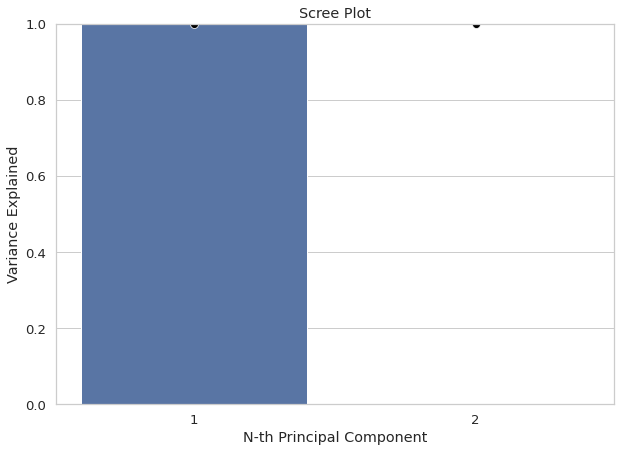

In [ ]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

# **PCA**

Normalizar variables debido a las diferentes escalas antes de realizar PCA

In [ ]:
df.head()

,Amount_credit,Age,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [ ]:
pcs = PCA()
pcs.fit(preprocessing.scale(df.iloc[:, :].dropna(axis=0)))   #Normalizar
#pcs.fit(df.iloc[:, :].dropna(axis=0))

pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.432921,1.309882,1.022269,0.961876,0.940087,0.934241,0.882984,0.852438,0.841041,0.514249,0.266470,0.202644,0.15918,0.152463
Proportion of variance,0.422779,0.122552,0.074643,0.066084,0.063124,0.062341,0.055688,0.051902,0.050523,0.018889,0.005072,0.002933,0.00181,0.001660
Cumulative proportion,0.422779,0.545331,0.619974,0.686058,0.749182,0.811523,0.867211,0.919113,0.969636,0.988525,0.993597,0.996530,0.99834,1.000000


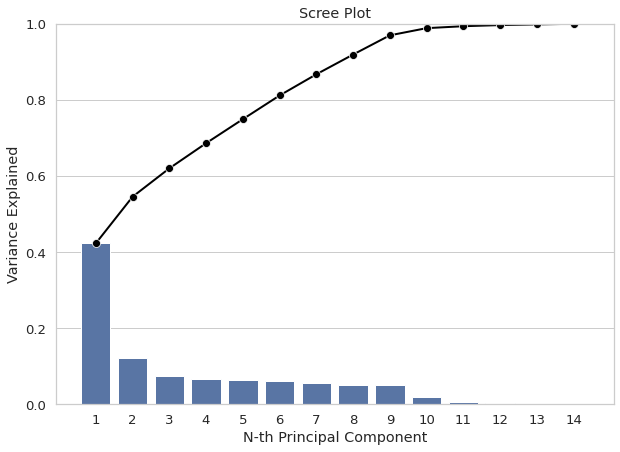

In [ ]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [ ]:
#La suma de los 6 primeros componentes principales representan mas del 80% de la varianza

(pcsSummary_df.iloc[1][0:6]*100).sum().round(2)

#pcsSummary_df.iloc[1][1]
#pcsSummary_df.iloc[1][2]


#((pcsSummary_df.iloc[2][2])*100).round(2)
#type(pcsSummary_df)

81.15

**Análisis:**
* Los primeros 6 componentes explican mas del 80% de la varianza


In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df.iloc[:, :].columns #index = df.iloc[:, 3:].columns
                                )
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
Amount_credit,0.165507,0.300709,-0.378575,-0.200103,0.035312
Age,0.032789,0.071906,-0.869471,0.338990,-0.039760
X12,0.372446,-0.190793,-0.034207,-0.063899,0.041391
X13,0.383253,-0.174644,-0.001814,0.007629,0.083164
X14,0.388264,-0.126883,0.034747,0.060528,0.113790
X15,0.391557,-0.120403,0.034073,0.074774,0.028378
X16,0.388505,-0.105928,0.033882,0.039553,-0.106756
X17,0.380672,-0.094157,0.018489,-0.070616,-0.164986
X18,0.135120,0.383194,0.173845,0.362055,0.225652
X19,0.116768,0.408391,0.200925,0.345745,0.148714


In [ ]:
pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df.iloc[:, :].columns  #index = df.iloc[:, 3:].columns
                                )

grafica = pcsComponents_dfX.iloc[:,:6]

grafica.style.background_gradient(cmap='Greens')


#pcsComponents_dfX.iloc[:,:5]*1000 #Se multiplico por 1000 para una mejor visualización. Los valores estan en miles...

,PC1,PC2,PC3,PC4,PC5,PC6
Amount_credit,0.165507,0.300709,-0.378575,-0.200103,0.035312,-0.078883
Age,0.032789,0.071906,-0.869471,0.338990,-0.039760,0.071461
X12,0.372446,-0.190793,-0.034207,-0.063899,0.041391,-0.043987
X13,0.383253,-0.174644,-0.001814,0.007629,0.083164,-0.028824
X14,0.388264,-0.126883,0.034747,0.060528,0.113790,0.099239
X15,0.391557,-0.120403,0.034073,0.074774,0.028378,0.014527
X16,0.388505,-0.105928,0.033882,0.039553,-0.106756,-0.099290
X17,0.380672,-0.094157,0.018489,-0.070616,-0.164986,0.069272
X18,0.135120,0.383194,0.173845,0.362055,0.225652,0.040574
X19,0.116768,0.408391,0.200925,0.345745,0.148714,0.408361


In [ ]:
df

,Amount_credit,Age,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000,41.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [ ]:
cor = df.corr().round(2)
cor.style.background_gradient(cmap='Greens')


,Amount_credit,Age,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
Amount_credit,1.000000,0.140000,0.290000,0.280000,0.280000,0.290000,0.300000,0.290000,0.200000,0.180000,0.210000,0.200000,0.220000,0.220000
Age,0.140000,1.000000,0.060000,0.050000,0.050000,0.050000,0.050000,0.050000,0.030000,0.020000,0.030000,0.020000,0.020000,0.020000
X12,0.290000,0.060000,1.000000,0.950000,0.890000,0.860000,0.830000,0.800000,0.140000,0.100000,0.160000,0.160000,0.170000,0.180000
X13,0.280000,0.050000,0.950000,1.000000,0.930000,0.890000,0.860000,0.830000,0.280000,0.100000,0.150000,0.150000,0.160000,0.170000
X14,0.280000,0.050000,0.890000,0.930000,1.000000,0.920000,0.880000,0.850000,0.240000,0.320000,0.130000,0.140000,0.180000,0.180000
X15,0.290000,0.050000,0.860000,0.890000,0.920000,1.000000,0.940000,0.900000,0.230000,0.210000,0.300000,0.130000,0.160000,0.180000
X16,0.300000,0.050000,0.830000,0.860000,0.880000,0.940000,1.000000,0.950000,0.220000,0.180000,0.250000,0.290000,0.140000,0.160000
X17,0.290000,0.050000,0.800000,0.830000,0.850000,0.900000,0.950000,1.000000,0.200000,0.170000,0.230000,0.250000,0.310000,0.120000
X18,0.200000,0.030000,0.140000,0.280000,0.240000,0.230000,0.220000,0.200000,1.000000,0.290000,0.250000,0.200000,0.150000,0.190000
X19,0.180000,0.020000,0.100000,0.100000,0.320000,0.210000,0.180000,0.170000,0.290000,1.000000,0.240000,0.180000,0.180000,0.160000


**Análisis PCA:**

Tras el análisis PCA, se determinó que las variables mas influyentes en los componentes 1-6 (Explican el 80% de la varianza total) son las siguientes:

  * Edad: -0.86 con PC3
  * X22: -0.6 con PC4, 0.6 con PC6
  * X23: 0.65 con PC5
  * X21: -0.57 con PC5 y -0.5 con PC6
  * X15: 0.39 en PC1

**Nota:**

Se incluyo X15 por ser la variable mas importente en PC1, el cual es el componente mas relevante(Explica 40% de la varianza). Las variables X12 - X17 tienen una correlacion bastante alta, por lo que se decidió dejar solo X15 y asumir que existe cierta proporcionalidad con respecto a las otras.

Identificación de Valores Atipicos

In [ ]:
df_st = (df - df.mean())/df.std()

In [ ]:
df_st

,Amount_credit,Age,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,-1.137344,-1.246261,-0.642486,-0.647349,-0.667914,-0.672408,-0.663020,-0.652703,-0.341884,-0.227130,-0.296778,-0.308102,-0.314119,-0.293480
1,-0.366555,-1.029207,-0.659194,-0.666685,-0.639190,-0.621573,-0.606219,-0.597973,-0.341884,-0.213642,-0.240015,-0.244311,-0.314119,-0.181051
2,-0.597792,-0.160993,-0.298733,-0.493932,-0.482428,-0.449755,-0.417270,-0.391739,-0.250266,-0.191955,-0.240015,-0.244311,-0.248698,-0.012407
3,-0.906107,0.164587,-0.057796,-0.013586,0.032552,-0.232508,-0.186926,-0.156806,-0.221175,-0.169445,-0.228663,-0.237932,-0.244184,-0.237265
4,-0.906107,2.335122,-0.578638,-0.611287,-0.161380,-0.347074,-0.348254,-0.331621,-0.221175,1.333939,0.270845,0.266016,-0.269044,-0.255310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404233,0.381640,1.869019,2.016740,2.325172,0.694863,-0.149475,-0.384505,0.171128,0.610440,-0.012796,-0.113731,0.012987,-0.237265
29996,-0.135319,0.815747,-0.672754,-0.665239,-0.627372,-0.532906,-0.577695,-0.652703,-0.231013,-0.104082,0.213969,-0.299873,-0.314119,-0.293480
29997,-1.060265,0.164587,-0.647209,-0.643782,-0.638095,-0.348038,-0.324646,-0.327828,-0.341884,-0.257014,0.951992,-0.040180,-0.183276,-0.119215
29998,-0.674871,0.598694,-0.717925,0.409746,0.421871,0.147514,-0.468120,0.168741,4.842552,-0.109157,-0.229912,-0.185241,3.150852,-0.192069


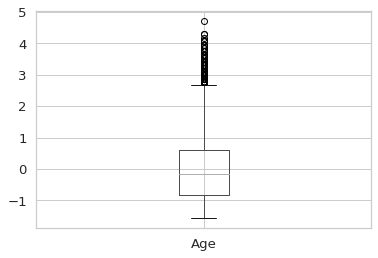

In [ ]:
df_st[['Age']].boxplot()

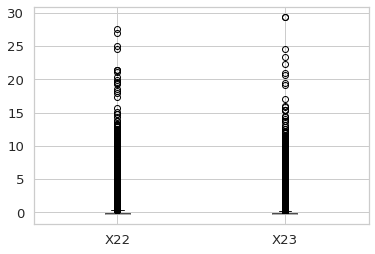

In [ ]:
df_st[['X22','X23']].boxplot()

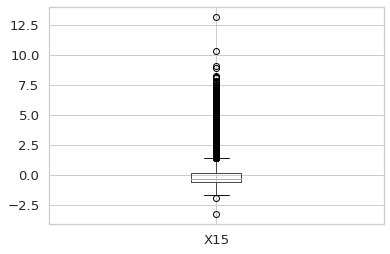

In [ ]:
df_st[['X15']].boxplot()

¿Cuál es el número de componentes mínimo y por qué?


¿Cuál es la variación de los datos que representan esos componentes?


¿Cuál es la pérdida de información después de realizar PCA?
De las variables originales

¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?


¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?